In [130]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
%config InlineBackend.figure_format = 'retina'

In [133]:
cwd = os.getcwd()

# Conversion to DataFrame

In [136]:
# xml
students_df = pd.read_xml(f'{cwd}/data/students.xml')
students_df.head()

,name,email,grade,age
0,John,john@mail.com,A,16
1,Alice,alice@mail.com,B,17
2,Bob,bob@mail.com,C,16
3,Hannah,hannah@mail.com,A,17


In [137]:
# json
subjects_df = pd.read_json(f'{cwd}/data/students.json')
subjects_df.head()

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [117]:
# html
table_MN = pd.read_html('https://en.wikipedia.org/wiki/Minnesota', match='Election results from statewide races')[0]
table_MN.head()

,Year,Office,GOP,DFL,Others
0,2020,President,45.3%,52.4%,2.3%
1,2020,Senator,43.5%,48.8%,7.7%
2,2018,Governor,42.4%,53.9%,3.7%
3,2018,Senator,36.2%,60.3%,3.4%
4,2018,Senator,42.4%,53.0%,4.6%


In [138]:
# csv
df_student = pd.read_csv(f'{cwd}/data/student_info.csv')
df_student

,id,name,age,birthday,previous_job,salary,cohort
0,65,Marti,21,05-12-2000,NaN,25000,10.0
1,66,Joleena,22,10-12-1999,software engineer,42000,10.0
2,67,Nestor,23,08-08-1998,math teacher,60000,10.0
3,68,Faye,24,10-22-1997,software engineer,125000,10.0
4,69,Bobby,20,01-01-2001,student,0,8.0
5,70,Tom,26,06-07-1995,math teacher,175000,6.0
6,71,Xue,21,04-30-2000,computer scientist,20000,8.0
7,64,Isabella,22,02-19-1999,researcher,44000,NaN


# Exploration

In [129]:
df_student.head()

,id,name,age,birthday,previous_job,salary,cohort
0,65,Marti,21,05-12-2000,NaN,25000,10.0
1,66,Joleena,22,10-12-1999,software engineer,42000,10.0
2,67,Nestor,23,08-08-1998,math teacher,60000,10.0
3,68,Faye,24,10-22-1997,software engineer,125000,10.0
4,69,Bobby,20,01-01-2001,student,0,8.0


In [120]:
df_student.shape

(8, 7)

In [121]:
df_student.columns

Index(['id', 'name', 'age', 'birthday', 'previous_job', 'salary', 'cohort'], dtype='object')

In [122]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8 non-null      int64  
 1   name          8 non-null      object 
 2   age           8 non-null      int64  
 3   birthday      8 non-null      object 
 4   previous_job  7 non-null      object 
 5   salary        8 non-null      int64  
 6   cohort        7 non-null      float64
dtypes: float64(1), int64(3), object(3)
memory usage: 576.0+ bytes


In [123]:
df_student.isnull()

,id,name,age,birthday,previous_job,salary,cohort
0,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True


In [124]:
df_student.describe()

,id,age,salary,cohort
count,8.00000,8.00000,8.000000,7.000000
mean,67.50000,22.37500,61375.000000,8.857143
std,2.44949,1.92261,59088.160525,1.573592
min,64.00000,20.00000,0.000000,6.000000
25%,65.75000,21.00000,23750.000000,8.000000
50%,67.50000,22.00000,43000.000000,10.000000
75%,69.25000,23.25000,76250.000000,10.000000
max,71.00000,26.00000,175000.000000,10.000000


# Preprocessing

## Converting Data Types

In [125]:
df_student.dtypes

id                int64
name             object
age               int64
birthday         object
previous_job     object
salary            int64
cohort          float64
dtype: object

In [126]:
df_student['birthday'] = pd.to_datetime(df_student['birthday'])
df_student['cohort'] = df_student['cohort'].astype('category')

In [127]:
df_student.dtypes

id                       int64
name                    object
age                      int64
birthday        datetime64[ns]
previous_job            object
salary                   int64
cohort                category
dtype: object

In [80]:
df_student['previous_job'] = df_student['previous_job'].fillna('student')
df_student['salary'] = df_student['salary'].fillna(0)

In [81]:
df_student

,id,name,age,birthday,previous_job,salary,cohort
0,65,Marti,21,2000-05-12,student,25000,10.0
1,66,Joleena,22,1999-10-12,software engineer,42000,10.0
2,67,Nestor,23,1998-08-08,math teacher,60000,10.0
3,68,Faye,24,1997-10-22,software engineer,125000,10.0
4,69,Bobby,20,2001-01-01,student,0,8.0
5,70,Tom,26,1995-06-07,math teacher,175000,6.0
6,71,Xue,21,2000-04-30,computer scientist,20000,8.0
7,64,Isabella,22,1999-02-19,researcher,44000,NaN


## Appending Data

In [82]:
df_student['gender'] = ['F', 'F', 'M', 'F', 'M', 'M', 'F', 'F']
df_student

,id,name,age,birthday,previous_job,salary,cohort,gender
0,65,Marti,21,2000-05-12,student,25000,10.0,F
1,66,Joleena,22,1999-10-12,software engineer,42000,10.0,F
2,67,Nestor,23,1998-08-08,math teacher,60000,10.0,M
3,68,Faye,24,1997-10-22,software engineer,125000,10.0,F
4,69,Bobby,20,2001-01-01,student,0,8.0,M
5,70,Tom,26,1995-06-07,math teacher,175000,6.0,M
6,71,Xue,21,2000-04-30,computer scientist,20000,8.0,F
7,64,Isabella,22,1999-02-19,researcher,44000,NaN,F


## Removing/Reindex Data

In [83]:
df_student = df_student.drop('id', axis=1)
df_name_index = df_student.set_index('name')

In [84]:
df_name_index

,age,birthday,previous_job,salary,cohort,gender
name,,,,,,
Marti,21,2000-05-12,student,25000,10.0,F
Joleena,22,1999-10-12,software engineer,42000,10.0,F
Nestor,23,1998-08-08,math teacher,60000,10.0,M
Faye,24,1997-10-22,software engineer,125000,10.0,F
Bobby,20,2001-01-01,student,0,8.0,M
Tom,26,1995-06-07,math teacher,175000,6.0,M
Xue,21,2000-04-30,computer scientist,20000,8.0,F
Isabella,22,1999-02-19,researcher,44000,NaN,F


# Visualize

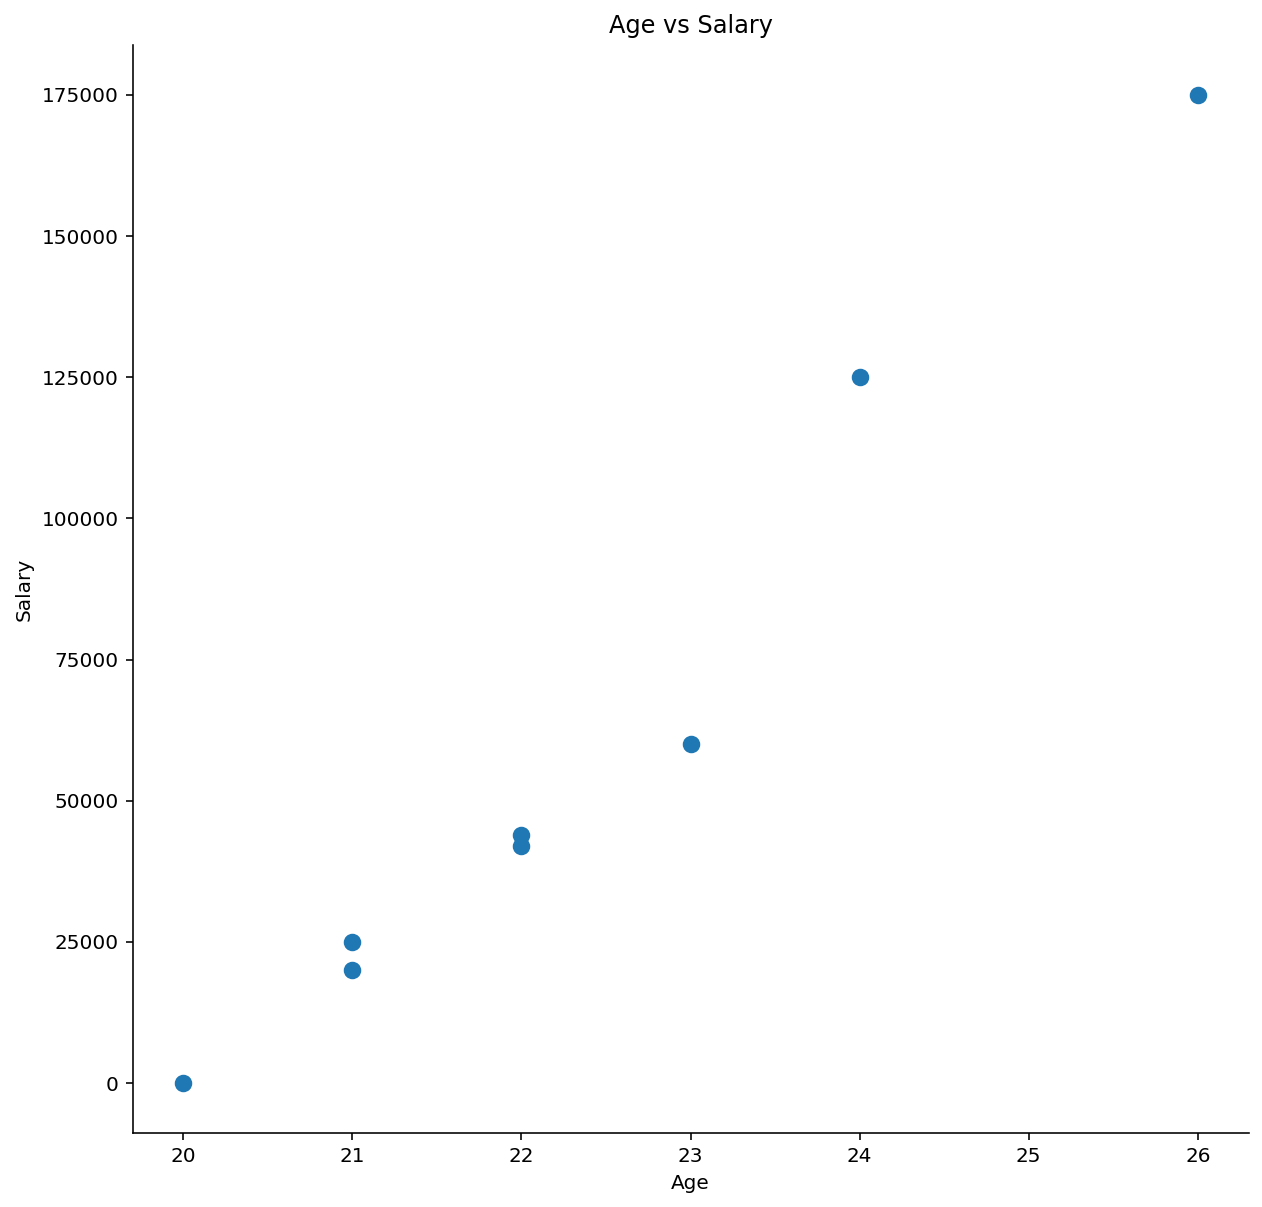

In [109]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df_student['age'], df_student['salary'], s=60)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
plt.title('Age vs Salary')
plt.savefig('avg_account.png', bbox_inches='tight', pad_inches=0.1)

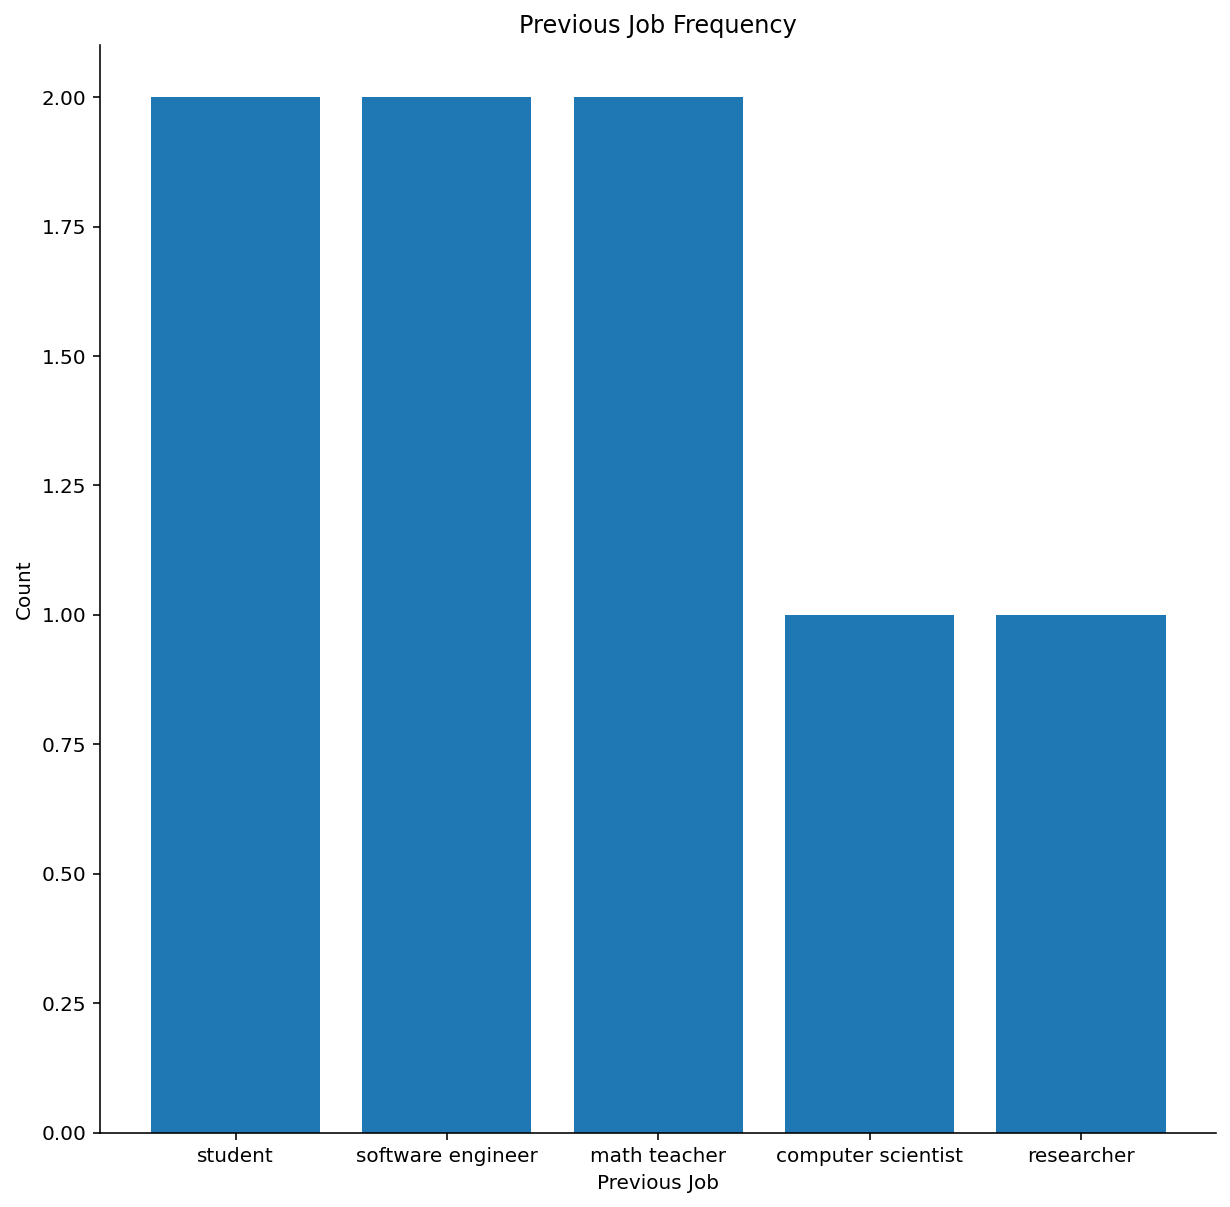

In [107]:
x = df_student['previous_job'].value_counts().index
y = df_student['previous_job'].value_counts().values

fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(x, y)
plt.title('Previous Job Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Previous Job')
ax.set_ylabel('Count')
plt.savefig('job_freq.png', bbox_inches='tight', pad_inches=0.1)


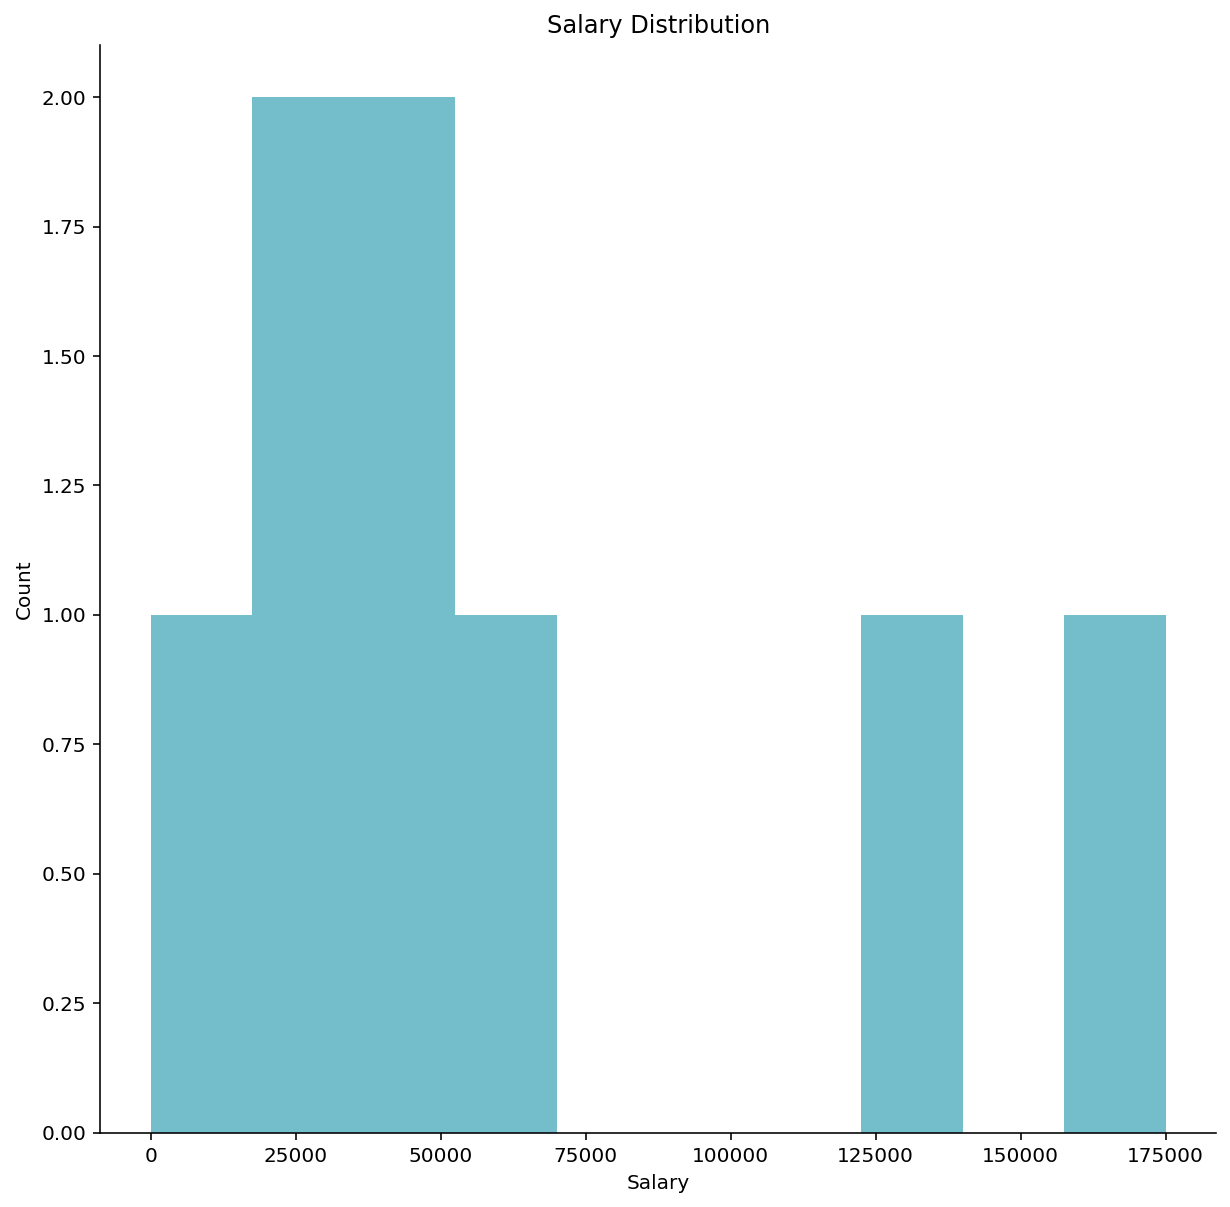

In [108]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(df_student['salary'], color='#74bdcb')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Salary Distribution')
ax.set_xlabel('Salary')
ax.set_ylabel('Count')
plt.savefig('salary_hist.png', bbox_inches='tight', pad_inches=0.1)